In [1]:
import lzma
import cv2
import numpy as np
import tarfile
import pandas as pd
from matplotlib import pyplot as plt
import torch
from torchvision import datasets
from torch.utils.data import DataLoader
from tqdm import tqdm
from PIL import Image

/home/polina/anaconda3/envs/ds/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def _extract_file(path_from, path_to):
    with tarfile.open(path_from) as f:
        f.extractall(path_to)


In [4]:
# extract_file('./dataset2/rtsd-public/detection/rtsd-d1-frames.tar.lzma', './dataset2/rtsd-public/ext_detection')

In [5]:
# extract_file('./dataset2/rtsd-public/detection/rtsd-d1-gt.tar.lzma', './dataset2/rtsd-public/ext_detection')

In [15]:
# with tarfile.open("./dataset2/rtsd-public/classification/rtsd-r3.tar.lzma") as f:
#     f.extractall('./dataset2/rtsd-public/extracted')

In [13]:
# with tarfile.open("./dataset2/rtsd-public/classification/rtsd-r1.tar.lzma") as f:
#     f.extractall('./dataset2/rtsd-public/extracted')

In [16]:
# with tarfile.open("./dataset2/rtsd-public/full-frames.tar.lzma") as f:
#     f.extractall('./dataset2/rtsd-public/extracted')

In [10]:
df_full_images = pd.read_csv('./dataset2/rtsd-public/full-gt.csv')
df_full_images

filename  x_from  y_from  width  height  \
0         autosave01_02_2012_09_13_33.jpg     649     376     18      18   
1         autosave01_02_2012_09_13_34.jpg     671     356     20      21   
2         autosave01_02_2012_09_13_35.jpg     711     332     27      26   
3         autosave01_02_2012_09_13_36.jpg     764     290     37      36   
4         autosave01_02_2012_09_13_36.jpg     684     384     17      17   
...                                   ...     ...     ...    ...     ...   
104353  autosave24_10_2013_13_18_37_1.jpg     622     394     27      16   
104354  autosave24_10_2013_13_18_37_2.jpg     638     387     31      18   
104355  autosave24_10_2013_13_18_38_0.jpg     647     385     33      20   
104356  autosave24_10_2013_13_18_38_1.jpg     668     378     41      23   
104357  autosave24_10_2013_13_18_38_2.jpg     703     370     46      26   

       sign_class  sign_id  
0             2_1        0  
1             2_1        0  
2             2_1        0  
3             2_1        0  
4            1_23        1  
...           ...      ...  
104353     5_15_7     2565  
104354     5_15_7     2565  
104355     5_15_7     2565  
104356     5_15_7     2565  
104357     5_15_7     2565  

[104358 rows x 7 columns]

In [18]:
map_class_names = {"2_1": 1, "1_23": 2, "1_17": 3, "3_24": 4, "8_2_1": 5, "5_20": 6, "5_19_1": 7, "5_16": 8, "3_25": 9, "6_16": 10, "7_15": 11, "2_2": 12, "2_4": 13, "8_13_1": 14, "4_2_1": 15, "1_20_3": 16, "1_25": 17, "3_4": 18, "8_3_2": 19, "3_4_1": 20, "4_1_6": 21, "4_2_3": 22, "4_1_1": 23, "1_33": 24, "5_15_5": 25, "3_27": 26, "1_15": 27, "4_1_2_1": 28, "6_3_1": 29, "8_1_1": 30, "6_7": 31, "5_15_3": 32, "7_3": 33, "1_19": 34, "6_4": 35, "8_1_4": 36, "8_8": 37, "1_16": 38, "1_11_1": 39, "6_6": 40, "5_15_1": 41, "7_2": 42, "5_15_2": 43, "7_12": 44, "3_18": 45, "5_6": 46, "5_5": 47, "7_4": 48, "4_1_2": 49, "8_2_2": 50, "7_11": 51, "1_22": 52, "1_27": 53, "2_3_2": 54, "5_15_2_2": 55, "1_8": 56, "3_13": 57, "2_3": 58, "8_3_3": 59, "2_3_3": 60, "7_7": 61, "1_11": 62, "8_13": 63, "1_12_2": 64, "1_20": 65, "1_12": 66, "3_32": 67, "2_5": 68, "3_1": 69, "4_8_2": 70, "3_20": 71, "3_2": 72, "2_3_6": 73, "5_22": 74, "5_18": 75, "2_3_5": 76, "7_5": 77, "8_4_1": 78, "3_14": 79, "1_2": 80, "1_20_2": 81, "4_1_4": 82, "7_6": 83, "8_1_3": 84, "8_3_1": 85, "4_3": 86, "4_1_5": 87, "8_2_3": 88, "8_2_4": 89, "1_31": 90, "3_10": 91, "4_2_2": 92, "7_1": 93, "3_28": 94, "4_1_3": 95, "5_4": 96, "5_3": 97, "6_8_2": 98, "3_31": 99, "6_2": 100, "1_21": 101, "3_21": 102, "1_13": 103, "1_14": 104, "2_3_4": 105, "4_8_3": 106, "6_15_2": 107, "2_6": 108, "3_18_2": 109, "4_1_2_2": 110, "1_7": 111, "3_19": 112, "1_18": 113, "2_7": 114, "8_5_4": 115, "5_15_7": 116, "5_14": 117, "5_21": 118, "1_1": 119, "6_15_1": 120, "8_6_4": 121, "8_15": 122, "4_5": 123, "3_11": 124, "8_18": 125, "8_4_4": 126, "3_30": 127, "5_7_1": 128, "5_7_2": 129, "1_5": 130, "3_29": 131, "6_15_3": 132, "5_12": 133, "3_16": 134, "1_30": 135, "5_11": 136, "1_6": 137, "8_6_2": 138, "6_8_3": 139, "3_12": 140, "3_33": 141, "8_4_3": 142, "5_8": 143, "8_14": 144, "8_17": 145, "3_6": 146, "1_26": 147, "8_5_2": 148, "6_8_1": 149, "5_17": 150, "1_10": 151, "8_16": 152, "7_18": 153, "7_14": 154, "8_23": 155}

In [10]:
number_of_classes = len(df_full_images['sign_class'].unique())
number_of_classes

198

In [ ]:
it = iter(np.arange(number_of_classes))
mapping_classes = {}
for x in df_full_images['sign_class'].unique():
    mapping_classes.update({x: next(it)})
mapping_classes

In [21]:
df_full_images['classes_number'] = list(map(lambda x: mapping_classes[x], df_full_images['sign_class']))

In [22]:
df_full_images

filename  x_from  y_from  width  height  \
0         autosave01_02_2012_09_13_33.jpg     649     376     18      18   
1         autosave01_02_2012_09_13_34.jpg     671     356     20      21   
2         autosave01_02_2012_09_13_35.jpg     711     332     27      26   
3         autosave01_02_2012_09_13_36.jpg     764     290     37      36   
4         autosave01_02_2012_09_13_36.jpg     684     384     17      17   
...                                   ...     ...     ...    ...     ...   
104353  autosave24_10_2013_13_18_37_1.jpg     622     394     27      16   
104354  autosave24_10_2013_13_18_37_2.jpg     638     387     31      18   
104355  autosave24_10_2013_13_18_38_0.jpg     647     385     33      20   
104356  autosave24_10_2013_13_18_38_1.jpg     668     378     41      23   
104357  autosave24_10_2013_13_18_38_2.jpg     703     370     46      26   

       sign_class  sign_id  classes_number  
0             2_1        0               0  
1             2_1        0               0  
2             2_1        0               0  
3             2_1        0               0  
4            1_23        1               1  
...           ...      ...             ...  
104353     5_15_7     2565             131  
104354     5_15_7     2565             131  
104355     5_15_7     2565             131  
104356     5_15_7     2565             131  
104357     5_15_7     2565             131  

[104358 rows x 8 columns]

In [43]:
df_tmp = df_full_images[df_full_images['sign_class'] == '3_24_n80']
df_tmp

filename  x_from  y_from  width  height  \
4671   autosave02_10_2012_11_56_50_1.jpg     847     289     19      19   
4672   autosave02_10_2012_11_56_50_2.jpg     885     287     19      19   
4673   autosave02_10_2012_11_56_51_0.jpg     921     288     22      21   
4674   autosave02_10_2012_11_56_51_1.jpg     990     253     27      27   
4675   autosave02_10_2012_11_56_51_2.jpg    1088     233     32      32   
...                                  ...     ...     ...    ...     ...   
83022  autosave21_01_2013_12_40_44_2.jpg     277     347     23      21   
83023  autosave21_01_2013_12_40_45_0.jpg     251     335     26      24   
83025  autosave21_01_2013_12_40_45_1.jpg     206     322     26      24   
83027  autosave21_01_2013_12_40_45_2.jpg     164     317     27      29   
83029  autosave21_01_2013_12_40_46_0.jpg     105     295     33      34   

      sign_class  sign_id  
4671    3_24_n80     5443  
4672    3_24_n80     5443  
4673    3_24_n80     5443  
4674    3_24_n80     5443  
4675    3_24_n80     5443  
...          ...      ...  
83022   3_24_n80     3624  
83023   3_24_n80     3624  
83025   3_24_n80     3624  
83027   3_24_n80     3624  
83029   3_24_n80     3624  

[124 rows x 7 columns]

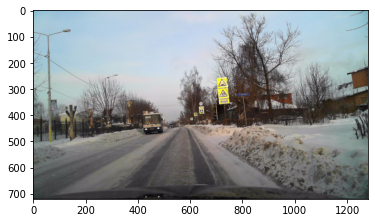

In [12]:
path = './dataset2/rtsd-public/extracted/rtsd-frames/' + df_full_images['filename'].iloc[1500]
img = Image.open(path)
plt.imshow(img)

In [16]:
shape = img.size
shape

(1280, 720)

In [15]:
df_full_images['filename'].iloc[1500]

'autosave01_02_2012_10_26_33'

In [28]:
def reduce_images(df, scaller, path_from, path_to):
    for i in range(len(df)):
        file_from = path_from + df['filename'].iloc[i]
        img = Image.open(file_from)
        shape = img.size
        img = img.resize((shape[0] // scaller, shape[1] // scaller), Image.ANTIALIAS)
        filename = path_to + df['filename'].iloc[i]
        img.save(filename, optimize=True, quality=95)
        x1 = df_full_images['x_from'].iloc[i] // scaller
        x2 = df_full_images['x_from'].iloc[i] // scaller + df_full_images['width'].iloc[i] // scaller + 1
        y1 = df_full_images['y_from'].iloc[i] // scaller
        y2 = df_full_images['y_from'].iloc[i] // scaller + df_full_images['height'].iloc[i] // scaller + 1
        df['x1'] = x1
        df['x2'] = x2
        df['y1'] = y1
        df['y2'] = y2


In [32]:
df_full_images.to_csv('./reduced_full_gt.csv')

In [29]:
# reduce_images(df_full_images, 2, './dataset2/rtsd-public/extracted/rtsd-frames/', './dataset_reduced/')

/tmp/ipykernel_17255/2768634819.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((shape[0] // scaller, shape[1] // scaller), Image.ANTIALIAS)
/tmp/ipykernel_17255/2768634819.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((shape[0] // scaller, shape[1] // scaller), Image.ANTIALIAS)


In [25]:
scale = 2
# filename = './dataset_reduced/' + df_full_images['filename'].iloc[1500]
img = img.resize((shape[0] // scale, shape[1] // scale), Image.ANTIALIAS)
filename = './dataset_reduced/' + df_full_images['filename'].iloc[1500]
img.save(filename, optimize=True, quality=95)
x1 = df_full_images['x_from'].iloc[1500] // scale
x2 = df_full_images['x_from'].iloc[1500] // scale + df_full_images['width'].iloc[1500] // scale + 1
y1 = df_full_images['y_from'].iloc[1500] // scale
y2 = df_full_images['y_from'].iloc[1500] // scale + df_full_images['height'].iloc[1500] // scale + 1

/tmp/ipykernel_17255/2757064226.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((shape[0] // scale, shape[1] // scale), Image.ANTIALIAS)


In [ ]:
img_cutted = Image.open(filename)
# img_cutted = img_cutted.load()
img_cutted = np.array(img_cutted)
img_cutted

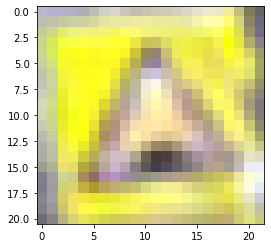

In [27]:
plt.imshow(img_cutted[y1: y2, x1: x2, :])

In [11]:
# from PIL import Image
 # My image is a 200x374 jpeg that is 102kb large
# foo = Image.open(path)
# foo.size
#   (200,374)
 # I downsize the image with an ANTIALIAS filter (gives the highest quality)
# foo = foo.resize((160,300),Image.ANTIALIAS)
# foo.save("path\\to\\save\\image_scaled.jpg",quality=95)
#  # The saved downsized image size is 24.8kb
# foo.save("path\\to\\save\\image_scaled_opt.jpg",optimize=True,quality=95)
#  # The saved downsized image size is 22.9kb

NameError: name 'path' is not defined

In [36]:
rows = df_full_images['y_from'].iloc[1500]

256

In [37]:
df_full_images['height'].iloc[1500]

41

In [ ]:
img_cutted[df_full_images['y_from'].iloc[1500] : df_full_images['y_from'].iloc[1500] + df_full_images['height'].iloc[1500], df_full_images['x_from'].iloc[1500]: df_full_images['x_from'].iloc[1500]+df_full_images['width'].iloc[1500], :] 

In [3]:
def get_coords_for_cut(df, index):
    y1 = df['y_from'].iloc[index]
    y2 = y1 + df['height'].iloc[index] + 1
    x1 = df['x_from'].iloc[index]
    x2 = x1 + df['width'].iloc[index] + 1
    return x1, y1, x2, y2

In [47]:
img_cutted = Image.open(path)
# img_cutted = img_cutted.load()
img_cutted = np.array(img_cutted)
x1, y1, x2, y2 = get_coords_for_cut(df_full_images, 1500)
img_cutted = img_cutted[y1 : y2 , x1 : x2, :] 
plt.imshow(img_cutted)

In [4]:
def form_dataset(df, path):
    data = []
    number_of_classes = len(df['sign_class'].unique())
    it = iter(np.arange(number_of_classes))
    mapping_classes = {}
    for x in df['sign_class'].unique():
        mapping_classes.update({x: next(it)})
    df['classes_number'] = list(map(lambda x: mapping_classes[x], df['sign_class']))

    for i in range(len(df)):
        filename = path + df['filename'].iloc[i]
        pic = Image.open(filename)
        # pic = np.array(pic) / 255
        class_num = df['classes_number'].iloc[i]
        x1, y1, x2, y2 = df['x1'], df['y1'], df['x2'], df['y2']
        # x1, y1, x2, y2 = get_coords_for_cut(df, i)
        res = [pic, class_num, x1, y1, x2, y2]
        data.append(res)
    return data

In [5]:
dataset = form_dataset(df_full_images, './dataset2/rtsd-public/extracted/rtsd-frames/')
dataset[:1]

[[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1280x720>,
  0,
  649,
  376,
  668,
  395]]

In [6]:
def collate_fn(data):

    pics = []
    targets = []
    # labels = torch.zeros((len(data)), dtype=int).cuda()
    # boxes = torch.zeros((1, 4)).cuda()
    for i, item in enumerate(data):
        pic = torch.from_numpy(np.array(item[0], dtype=float)).float()
        # pic = torch.from_numpy(np.array(item[0], dtype=float)).cuda().float()
        shape = pic.shape
        pic /= 255
        pic = pic.reshape((shape[2], shape[0], shape[1]))
        pics.append(pic)
        box = torch.tensor([[item[2], item[3], item[4], item[5]]], dtype=float).float()
        # box = torch.tensor([[item[2], item[3], item[4], item[5]]], dtype=float).cuda().float()
        target = {
                    'boxes': box,
                    'labels': torch.tensor([item[1]], dtype=int)
                    # 'labels': torch.tensor([item[1]], dtype=int).cuda()
                }
        targets.append(target)

    return {
        'images': pics,
        'targets': targets
    }

In [7]:
collate_fn(dataset[:1])

{'images': [tensor([[[0.4667, 0.9922, 0.9882,  ..., 0.9922, 0.6706, 0.9882],
           [0.9922, 0.6706, 0.9882,  ..., 0.9961, 0.9961, 0.6902],
           [0.9961, 0.9961, 0.6980,  ..., 0.2275, 0.8902, 0.9725],
           ...,
           [0.4706, 0.9608, 0.9686,  ..., 0.9922, 0.6392, 0.9922],
           [0.9922, 0.6392, 0.9922,  ..., 0.3294, 0.5922, 0.0863],
           [0.2941, 0.5608, 0.0824,  ..., 0.0039, 0.0941, 0.1490]],
  
          [[0.4980, 0.9804, 1.0000,  ..., 0.9922, 0.6196, 0.9961],
           [0.9922, 0.6196, 0.9961,  ..., 0.3529, 0.5686, 0.1451],
           [0.3216, 0.5373, 0.1176,  ..., 0.0000, 0.0431, 0.1451],
           ...,
           [0.0196, 0.2275, 0.4000,  ..., 0.5765, 0.3137, 0.4118],
           [0.5725, 0.3176, 0.4078,  ..., 0.4824, 0.8510, 0.2235],
           [0.4824, 0.8588, 0.2196,  ..., 0.0863, 0.4275, 0.7373]],
  
          [[0.0627, 0.2196, 0.4588,  ..., 0.5843, 0.2941, 0.4078],
           [0.5804, 0.2980, 0.4039,  ..., 0.4980, 0.8314, 0.2078],
           [

In [22]:
list(map(lambda x: map_class_names[x], df_full_images['sign_class']))

KeyError: '3_24_n40'

In [73]:
len(df_full_images['sign_class'].unique())

198

In [64]:
df1_test = pd.read_csv('./dataset2/rtsd-public/extracted/rtsd-r1/gt_test.csv')
df1_test

filename  class_number
0     000000.png            66
1     000001.png            66
2     000002.png            22
3     000003.png            22
4     000004.png            22
...          ...           ...
7546  007546.png            26
7547  007547.png            26
7548  007548.png            26
7549  007549.png            26
7550  007550.png            17

[7551 rows x 2 columns]

In [65]:
df2_test = pd.read_csv('./dataset2/rtsd-public/extracted/rtsd-r3/gt_test.csv')
df2_test

filename  class_number
0      000000.png            79
1      000001.png            79
2      000002.png            79
3      000003.png            79
4      000004.png            79
...           ...           ...
22962  022962.png            75
22963  022963.png            75
22964  022964.png            75
22965  022965.png            75
22966  022966.png            17

[22967 rows x 2 columns]

In [12]:
df1_train = pd.read_csv('./dataset2/rtsd-public/extracted/rtsd-r1/gt_train.csv')
df1_train

filename  class_number
0      000000.png            18
1      000001.png            18
2      000002.png            18
3      000003.png            18
4      000004.png             9
...           ...           ...
25427  025427.png            29
25428  025428.png            29
25429  025429.png            66
25430  025430.png            66
25431  025431.png            66

[25432 rows x 2 columns]

In [33]:
df2_train = pd.read_csv('./dataset2/rtsd-public/extracted/rtsd-r3/gt_train.csv')
df2_train

filename  class_number
0      000000.png            24
1      000001.png            24
2      000002.png            24
3      000003.png            24
4      000004.png            18
...           ...           ...
70682  070682.png            18
70683  070683.png            18
70684  070684.png            18
70685  070685.png            18
70686  070686.png            18

[70687 rows x 2 columns]

In [23]:
def unique_classes(data):
    uniques = set()
    for i, item in enumerate(data):
        # print(item[1])
        uniques.add(item[1])
    return len(uniques) + 1

In [12]:
class AnnotationImage:
    img: Image
    class_num: int
    x1: float
    y1: float
    x2: float
    y2: float

In [ ]:
def get_images_classes_boxes(path_to_df, filepath, map_classes):
    df = extract_df(path_to_df)
    dataset = []
    classes = list(map(lambda x: map_class_names[x], df['sign_class']))
    # for index in range(2):
    for index in range(len(df)):
        path = filepath + df['filename'].iloc[index]
        img = Image.open(path)
        label = df['class_number'].iloc[index]
        label = df['sign_class'].iloc[index]
        dataset.append((img, label))
    return dataset

In [9]:


# dataset_test = get_images_classes(df=df1_train, filepath='./dataset2/rtsd-public/extracted/rtsd-r1/train/')
# dataset_test

In [57]:
dataset_1 = get_images_classes(df1_train, './dataset2/rtsd-public/extracted/rtsd-r1/train/')

In [58]:
dataset_2 = get_images_classes(df2_train, './dataset2/rtsd-public/extracted/rtsd-r3/train/')

In [59]:
unique_classes(dataset_1)

68

In [60]:
unique_classes(dataset_2)

106

In [54]:
dataset_1

[(<PIL.PngImagePlugin.PngImageFile image mode=RGB size=48x48>, 18),
 (<PIL.PngImagePlugin.PngImageFile image mode=RGB size=48x48>, 18)]

In [67]:
dataset_common_train = get_im_cl_from_diff_df([df1_train, df2_train], ['./dataset2/rtsd-public/extracted/rtsd-r1/train/', './dataset2/rtsd-public/extracted/rtsd-r3/train/'])

In [68]:
dataset_common_test = get_im_cl_from_diff_df([df1_test, df2_test], ['./dataset2/rtsd-public/extracted/rtsd-r1/test/', './dataset2/rtsd-public/extracted/rtsd-r3/test/'])

In [69]:
len(dataset_common_test)

30518

In [70]:
unique_classes(dataset_common_test)

101

In [26]:
dataset_test[1][0]

In [7]:
df2_test = pd.read_csv('./dataset2/rtsd-public/extracted/rtsd-r3/gt_test.csv')
df2_test

filename  class_number
0      000000.png            79
1      000001.png            79
2      000002.png            79
3      000003.png            79
4      000004.png            79
...           ...           ...
22962  022962.png            75
22963  022963.png            75
22964  022964.png            75
22965  022965.png            75
22966  022966.png            17

[22967 rows x 2 columns]

In [4]:
tmp = cv2.imread('./dataset2/rtsd-public/extracted/rtsd-r1/train/000001.png')
plt.imshow(tmp)

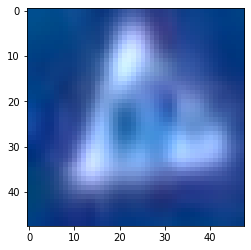

In [7]:
im = Image.open('./dataset2/rtsd-public/extracted/rtsd-r1/train/000001.png')
plt.imshow(im)

In [8]:
im = Image.open('./dataset2/rtsd-public/extracted/rtsd-frames/autosave01_02_2012_09_13_32.jpg')
plt.imshow(im)

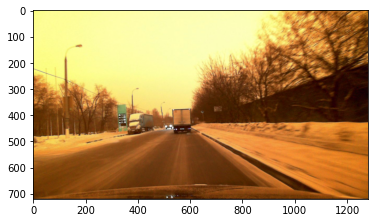

In [9]:
tmp = cv2.imread('./dataset2/rtsd-public/extracted/rtsd-frames/autosave01_02_2012_09_13_32.jpg')
plt.imshow(tmp)

In [8]:
dataset = datasets.MNIST('../dataset/', download=True)

In [12]:
dataset = datasets.GTSRB('./dataset_gtsrb/', download=True)

100%|██████████| 187490228/187490228 [00:17<00:00, 10604812.89it/s]


Extracting dataset_gtsrb/gtsrb/GTSRB-Training_fixed.zip to dataset_gtsrb/gtsrb


In [14]:
dataset

Dataset GTSRB
    Number of datapoints: 26640
    Root location: ./dataset_gtsrb/

In [ ]:
dataset._samples

In [28]:
dataset[3455]

(<PIL.Image.Image image mode=RGB size=31x30>, 3)

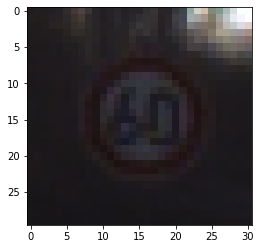

In [29]:
plt.imshow(dataset[3455][0])
plt.show()

In [30]:
data_loader = DataLoader(dataset=dataset,
                            batch_size=2,
                            shuffle=True,
                            collate_fn=collate_fn,
                            drop_last=True,
                            )

In [ ]:
# for epoch in tqdm(range(num_epoch)):
#     #dataloder
#     data_loader = DataLoader(dataset=dataset,
#                              batch_size=batch_size,
#                              shuffle=True,
#                              collate_fn=collate_fn,
#                              drop_last=True,
#                              )
#     for i, batch in enumerate(data_loader):
#         optim.zero_grad()
#         data = batch['data'].to(device).float()
#         predict = model(data.unsqueeze(1))
#         loss = criterion(predict, batch['target'].to(device))
#         loss.backward()
#         optim.step()
#         if i % 100:
#             print(loss)

In [11]:
map_sign_id_to_cls = {"2_1": 1, "1_23": 2, "1_17": 3, "3_24": 4, "8_2_1": 5, "5_20": 6, "5_19_1": 7, "5_16": 8, "3_25": 9, "6_16": 10, "7_15": 11, "2_2": 12, "2_4": 13, "8_13_1": 14, "4_2_1": 15, "1_20_3": 16, "1_25": 17, "3_4": 18, "8_3_2": 19, "3_4_1": 20, "4_1_6": 21, "4_2_3": 22, "4_1_1": 23, "1_33": 24, "5_15_5": 25, "3_27": 26, "1_15": 27, "4_1_2_1": 28, "6_3_1": 29, "8_1_1": 30, "6_7": 31, "5_15_3": 32, "7_3": 33, "1_19": 34, "6_4": 35, "8_1_4": 36, "8_8": 37, "1_16": 38, "1_11_1": 39, "6_6": 40, "5_15_1": 41, "7_2": 42, "5_15_2": 43, "7_12": 44, "3_18": 45, "5_6": 46, "5_5": 47, "7_4": 48, "4_1_2": 49, "8_2_2": 50, "7_11": 51, "1_22": 52, "1_27": 53, "2_3_2": 54, "5_15_2_2": 55, "1_8": 56, "3_13": 57, "2_3": 58, "8_3_3": 59, "2_3_3": 60, "7_7": 61, "1_11": 62, "8_13": 63, "1_12_2": 64, "1_20": 65, "1_12": 66, "3_32": 67, "2_5": 68, "3_1": 69, "4_8_2": 70, "3_20": 71, "3_2": 72, "2_3_6": 73, "5_22": 74, "5_18": 75, "2_3_5": 76, "7_5": 77, "8_4_1": 78, "3_14": 79, "1_2": 80, "1_20_2": 81, "4_1_4": 82, "7_6": 83, "8_1_3": 84, "8_3_1": 85, "4_3": 86, "4_1_5": 87, "8_2_3": 88, "8_2_4": 89, "1_31": 90, "3_10": 91, "4_2_2": 92, "7_1": 93, "3_28": 94, "4_1_3": 95, "5_4": 96, "5_3": 97, "6_8_2": 98, "3_31": 99, "6_2": 100, "1_21": 101, "3_21": 102, "1_13": 103, "1_14": 104, "2_3_4": 105, "4_8_3": 106, "6_15_2": 107, "2_6": 108, "3_18_2": 109, "4_1_2_2": 110, "1_7": 111, "3_19": 112, "1_18": 113, "2_7": 114, "8_5_4": 115, "5_15_7": 116, "5_14": 117, "5_21": 118, "1_1": 119, "6_15_1": 120, "8_6_4": 121, "8_15": 122, "4_5": 123, "3_11": 124, "8_18": 125, "8_4_4": 126, "3_30": 127, "5_7_1": 128, "5_7_2": 129, "1_5": 130, "3_29": 131, "6_15_3": 132, "5_12": 133, "3_16": 134, "1_30": 135, "5_11": 136, "1_6": 137, "8_6_2": 138, "6_8_3": 139, "3_12": 140, "3_33": 141, "8_4_3": 142, "5_8": 143, "8_14": 144, "8_17": 145, "3_6": 146, "1_26": 147, "8_5_2": 148, "6_8_1": 149, "5_17": 150, "1_10": 151, "8_16": 152, "7_18": 153, "7_14": 154, "8_23": 155}

In [51]:
class DatasetRTSD:
    def __init__(self) -> None:
        self.train_im_cl = None
        self.test_im_cl = None
        self.full_img_cl = None
        # self.map_class_names = {"2_1": 1, "1_23": 2, "1_17": 3, "3_24": 4, "8_2_1": 5, "5_20": 6, "5_19_1": 7, "5_16": 8, "3_25": 9, "6_16": 10, "7_15": 11, "2_2": 12, "2_4": 13, "8_13_1": 14, "4_2_1": 15, "1_20_3": 16, "1_25": 17, "3_4": 18, "8_3_2": 19, "3_4_1": 20, "4_1_6": 21, "4_2_3": 22, "4_1_1": 23, "1_33": 24, "5_15_5": 25, "3_27": 26, "1_15": 27, "4_1_2_1": 28, "6_3_1": 29, "8_1_1": 30, "6_7": 31, "5_15_3": 32, "7_3": 33, "1_19": 34, "6_4": 35, "8_1_4": 36, "8_8": 37, "1_16": 38, "1_11_1": 39, "6_6": 40, "5_15_1": 41, "7_2": 42, "5_15_2": 43, "7_12": 44, "3_18": 45, "5_6": 46, "5_5": 47, "7_4": 48, "4_1_2": 49, "8_2_2": 50, "7_11": 51, "1_22": 52, "1_27": 53, "2_3_2": 54, "5_15_2_2": 55, "1_8": 56, "3_13": 57, "2_3": 58, "8_3_3": 59, "2_3_3": 60, "7_7": 61, "1_11": 62, "8_13": 63, "1_12_2": 64, "1_20": 65, "1_12": 66, "3_32": 67, "2_5": 68, "3_1": 69, "4_8_2": 70, "3_20": 71, "3_2": 72, "2_3_6": 73, "5_22": 74, "5_18": 75, "2_3_5": 76, "7_5": 77, "8_4_1": 78, "3_14": 79, "1_2": 80, "1_20_2": 81, "4_1_4": 82, "7_6": 83, "8_1_3": 84, "8_3_1": 85, "4_3": 86, "4_1_5": 87, "8_2_3": 88, "8_2_4": 89, "1_31": 90, "3_10": 91, "4_2_2": 92, "7_1": 93, "3_28": 94, "4_1_3": 95, "5_4": 96, "5_3": 97, "6_8_2": 98, "3_31": 99, "6_2": 100, "1_21": 101, "3_21": 102, "1_13": 103, "1_14": 104, "2_3_4": 105, "4_8_3": 106, "6_15_2": 107, "2_6": 108, "3_18_2": 109, "4_1_2_2": 110, "1_7": 111, "3_19": 112, "1_18": 113, "2_7": 114, "8_5_4": 115, "5_15_7": 116, "5_14": 117, "5_21": 118, "1_1": 119, "6_15_1": 120, "8_6_4": 121, "8_15": 122, "4_5": 123, "3_11": 124, "8_18": 125, "8_4_4": 126, "3_30": 127, "5_7_1": 128, "5_7_2": 129, "1_5": 130, "3_29": 131, "6_15_3": 132, "5_12": 133, "3_16": 134, "1_30": 135, "5_11": 136, "1_6": 137, "8_6_2": 138, "6_8_3": 139, "3_12": 140, "3_33": 141, "8_4_3": 142, "5_8": 143, "8_14": 144, "8_17": 145, "3_6": 146, "1_26": 147, "8_5_2": 148, "6_8_1": 149, "5_17": 150, "1_10": 151, "8_16": 152, "7_18": 153, "7_14": 154, "8_23": 155}

    @staticmethod
    def _extract_df(filepath):
        return pd.read_csv(filepath)

    def _get_images_classes(self, path_to_df, filepath):
        df = self._extract_df(path_to_df)
        dataset = []
        # for index in range(2):
        for index in range(len(df)):
            path = filepath + df['filename'].iloc[index]
            img = Image.open(path)
            label = df['class_number'].iloc[index]
            dataset.append((img, label))
        return dataset

    def _get_im_cl_from_diff_df(self, paths_to_df: list, paths: list):
        dataset_common = []
        for i in range(len(paths)):
            dataset_common.extend(self._get_images_classes(path_to_df=paths_to_df[i], filepath=paths[i]))
        return dataset_common
    
    def get_info(self):
        filepath_to_df = [
            './dataset2/rtsd-public/extracted/rtsd-r1/gt_train.csv',
            './dataset2/rtsd-public/extracted/rtsd-r3/gt_train.csv',
            './dataset2/rtsd-public/extracted/rtsd-r1/gt_test.csv',
            './dataset2/rtsd-public/extracted/rtsd-r3/gt_test.csv',
            # './dataset2/rtsd-public/full-gt.csv',
        ]
        self.train_im_cl = self._get_im_cl_from_diff_df(
            paths_to_df=filepath_to_df[:2], 
            paths=['./dataset2/rtsd-public/extracted/rtsd-r1/train/', 
            './dataset2/rtsd-public/extracted/rtsd-r3/train/'])
        
        self.test_im_cl = self._get_im_cl_from_diff_df(
            paths_to_df=filepath_to_df[2:4], 
            paths=['./dataset2/rtsd-public/extracted/rtsd-r1/test/', 
            './dataset2/rtsd-public/extracted/rtsd-r3/test/'])
        
        # self.full_img_cl = self._get_im_cl_from_diff_df(
        #     paths_to_df=filepath_to_df[-1], 
        #     paths=['./dataset2/rtsd-public/extracted/rtsd-frames/'])


    @staticmethod
    def collate_fn(data):

        pics = []
        targets = []
        labels = torch.zeros((len(data)), dtype=int).cuda()
        boxes = torch.zeros((1, 4)).cuda()
        for i, item in enumerate(data):
            pic = torch.from_numpy(np.array(item[0], dtype=float)).cuda().float()
            shape = pic.shape
            pic /= 255
            pic = pic.reshape((shape[2], shape[0], shape[1]))
            pics.append(pic)
            box = torch.tensor([[0, 0, shape[1] - 1, shape[0] - 1]], dtype=float).cuda().float()
            target = {
                        'boxes': box,
                        'labels': torch.tensor([item[1]], dtype=int).cuda()
                    }
            targets.append(target)

        return {
            'images': pics,
            'targets': targets
        }
    
        

In [52]:
custom_ds = DatasetRTSD()
custom_ds.get_info()

In [3]:
df = pd.read_csv('./reduced_full_gt.csv')
df.head()

Unnamed: 0                         filename  x_from  y_from  width  height  \
0           0  autosave01_02_2012_09_13_33.jpg     649     376     18      18   
1           1  autosave01_02_2012_09_13_34.jpg     671     356     20      21   
2           2  autosave01_02_2012_09_13_35.jpg     711     332     27      26   
3           3  autosave01_02_2012_09_13_36.jpg     764     290     37      36   
4           4  autosave01_02_2012_09_13_36.jpg     684     384     17      17   

  sign_class  sign_id   x1   x2   y1   y2  
0        2_1        0  351  375  185  199  
1        2_1        0  351  375  185  199  
2        2_1        0  351  375  185  199  
3        2_1        0  351  375  185  199  
4       1_23        1  351  375  185  199

In [114]:
df['x1'] = df['x_from'] // 2
df['x2'] = df['x1'] + df['width'] // 2
df['y1'] = df['y_from'] // 2
df['y2'] = df['y1'] + df['height'] // 2

In [116]:
df.to_csv('./reduced_full_gt.csv')

In [4]:
number_of_classes = len(df['sign_class'].unique())
it = iter(np.arange(number_of_classes))
mapping_classes = {}
for x in df['sign_class'].unique():
    mapping_classes.update({x: next(it)})
df['classes_number'] = list(map(lambda x: mapping_classes[x], df['sign_class']))

In [5]:
df.head()

Unnamed: 0                         filename  x_from  y_from  width  height  \
0           0  autosave01_02_2012_09_13_33.jpg     649     376     18      18   
1           1  autosave01_02_2012_09_13_34.jpg     671     356     20      21   
2           2  autosave01_02_2012_09_13_35.jpg     711     332     27      26   
3           3  autosave01_02_2012_09_13_36.jpg     764     290     37      36   
4           4  autosave01_02_2012_09_13_36.jpg     684     384     17      17   

  sign_class  sign_id   x1   x2   y1   y2  classes_number  
0        2_1        0  351  375  185  199               0  
1        2_1        0  351  375  185  199               0  
2        2_1        0  351  375  185  199               0  
3        2_1        0  351  375  185  199               0  
4       1_23        1  351  375  185  199               1

In [11]:
df[df['classes_number'] == 4].count()[-1]

1007

In [14]:
count_classes = df.groupby(['classes_number']).count()
count_classes

Unnamed: 0  filename  x_from  y_from  width  height  \
classes_number                                                        
0                    10961     10961   10961   10961  10961   10961   
1                     2787      2787    2787    2787   2787    2787   
2                     1256      1256    1256    1256   1256    1256   
3                     2197      2197    2197    2197   2197    2197   
4                     1007      1007    1007    1007   1007    1007   
...                    ...       ...     ...     ...    ...     ...   
193                      6         6       6       6      6       6   
194                      2         2       2       2      2       2   
195                      6         6       6       6      6       6   
196                      9         9       9       9      9       9   
197                      3         3       3       3      3       3   

                sign_class  sign_id     x1     x2     y1     y2  
classes_number                                                   
0                    10961    10961  10961  10961  10961  10961  
1                     2787     2787   2787   2787   2787   2787  
2                     1256     1256   1256   1256   1256   1256  
3                     2197     2197   2197   2197   2197   2197  
4                     1007     1007   1007   1007   1007   1007  
...                    ...      ...    ...    ...    ...    ...  
193                      6        6      6      6      6      6  
194                      2        2      2      2      2      2  
195                      6        6      6      6      6      6  
196                      9        9      9      9      9      9  
197                      3        3      3      3      3      3  

[198 rows x 12 columns]

In [17]:
count_classes.index[197]

197

In [18]:
number_of_classes = {}
for i in range(len(count_classes)):
    number_of_classes[i] = count_classes['sign_class'].iloc[i]
number_of_classes

{0: 10961,
 1: 2787,
 2: 1256,
 3: 2197,
 4: 1007,
 5: 2007,
 6: 828,
 7: 24264,
 8: 5172,
 9: 71,
 10: 1054,
 11: 19,
 12: 548,
 13: 4095,
 14: 147,
 15: 1191,
 16: 101,
 17: 1024,
 18: 35,
 19: 72,
 20: 576,
 21: 75,
 22: 1190,
 23: 2333,
 24: 126,
 25: 1208,
 26: 3558,
 27: 227,
 28: 199,
 29: 261,
 30: 203,
 31: 96,
 32: 1592,
 33: 1104,
 34: 45,
 35: 1075,
 36: 34,
 37: 24,
 38: 341,
 39: 477,
 40: 814,
 41: 1493,
 42: 175,
 43: 4944,
 44: 147,
 45: 272,
 46: 533,
 47: 1027,
 48: 144,
 49: 473,
 50: 119,
 51: 138,
 52: 234,
 53: 943,
 54: 88,
 55: 997,
 56: 1390,
 57: 353,
 58: 9,
 59: 432,
 60: 2,
 61: 635,
 62: 164,
 63: 385,
 64: 694,
 65: 146,
 66: 178,
 67: 96,
 68: 191,
 69: 103,
 70: 165,
 71: 275,
 72: 103,
 73: 544,
 74: 995,
 75: 74,
 76: 1803,
 77: 160,
 78: 178,
 79: 11,
 80: 43,
 81: 20,
 82: 1,
 83: 334,
 84: 51,
 85: 2,
 86: 4,
 87: 310,
 88: 384,
 89: 1166,
 90: 68,
 91: 26,
 92: 180,
 93: 174,
 94: 208,
 95: 93,
 96: 106,
 97: 124,
 98: 19,
 99: 51,
 100: 543,
 10

In [58]:
reduced_classes = {}
threshold = 1000
for key in number_of_classes:
    if number_of_classes[key] >= threshold:
        reduced_classes[key] = number_of_classes[key]
reduced_classes
print(len(reduced_classes))

25


In [24]:
import torchvision.transforms.functional as TF

In [25]:
np.random.seed = 22

In [120]:
tmp = df[df['classes_number'] == 194]
tmp

Unnamed: 0                           filename  x_from  y_from  width  \
101579      101579  autosave24_10_2013_11_11_04_1.jpg     614     272     24   
101580      101580  autosave24_10_2013_11_11_04_2.jpg     627     240     28   

        height sign_class  sign_id   x1   x2   y1   y2  classes_number  
101579      24  3_13_r5.2     1973  307  319  136  148             194  
101580      28  3_13_r5.2     1973  313  327  120  134             194

In [123]:
img = Image.open('./dataset_reduced/' + tmp['filename'].iloc[0])
# shape = img.size
img1 = np.array(img, dtype=float) / 255
# shape = img.shape
# img = img.reshape((shape[2], shape[0], shape[1]))
# tensor = torch.from_numpy(img)
coords = torch.tensor([[[tmp['y1'].iloc[0], tmp['y2'].iloc[0]], [tmp['x1'].iloc[0], tmp['x2'].iloc[0]]]])


In [118]:
img.size

(640, 360)

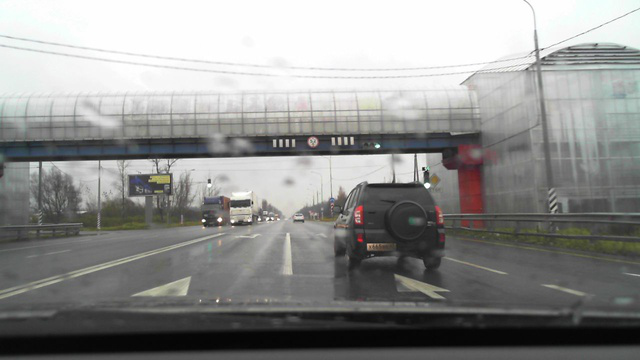

In [119]:
img

In [122]:
plt.imshow(img1[tmp['y1'].iloc[0]: tmp['y2'].iloc[0], tmp['x1'].iloc[0]: tmp['x2'].iloc[0], :])

In [121]:
[tmp['y1'].iloc[0], tmp['y2'].iloc[0]], [tmp['x1'].iloc[0], tmp['x2'].iloc[0]]

([136, 148], [307, 319])

In [44]:
tensor.shape

torch.Size([3, 360, 640])

In [144]:
# image = TF.rotate(tensor, 90)
TF.rotate(img, 50)
# plt.imshow(image.reshape(shape[0], shape[1], shape[2]))

In [53]:
new_coords = coords.reshape((2, 2))

In [125]:
coords

tensor([[[136, 148],
         [307, 319]]])

In [145]:
coords_rotated = TF.rotate(coords, 50)
coords_rotated

tensor([[[148, 319],
         [136, 307]]])

In [89]:
coords_rotated[0][0]

tensor([185, 199])

In [130]:
shape = img1[coords_rotated[0][1][0] : coords_rotated[0][1][1], coords_rotated[0][0][0]: coords_rotated[0][0][1], :].shape
img2 = img1[coords_rotated[0][1][0] : coords_rotated[0][1][1], coords_rotated[0][0][0]: coords_rotated[0][0][1], :].reshape((shape[1], shape[0], shape[2]))

In [133]:
coords_rotated[0][0]

tensor([136, 148])

In [147]:
plt.imshow(img1[coords_rotated[0][0][0] : coords_rotated[0][0][1], coords_rotated[0][1][0]: coords_rotated[0][1][1], :])